In [1]:
%matplotlib inline

In [3]:
# %load solution1.py
"""
The whole piece of fabric they're working on is a very large square - at least
1000 inches on each side.

Each Elf has made a claim about which area of fabric would be ideal for Santa's
suit. All claims have an ID and consist of a single rectangle with edges
parallel to the edges of the fabric. Each claim's rectangle is defined as
follows:

    The number of inches between the left edge of the fabric and the left edge
        of the rectangle.
    The number of inches between the top edge of the fabric and the top edge of
        the rectangle.
    The width of the rectangle in inches.
    The height of the rectangle in inches.

A claim like #123 @ 3,2: 5x4 means that claim ID 123 specifies a rectangle 3
inches from the left edge, 2 inches from the top edge, 5 inches wide, and 4
inches tall. Visually, it claims the square inches of fabric represented by #
(and ignores the square inches of fabric represented by .) in the diagram
below:

...........
...........
...#####...
...#####...
...#####...
...#####...
...........
...........
...........

The problem is that many of the claims overlap, causing two or more claims to
cover part of the same areas. For example, consider the following claims:

#1 @ 1,3: 4x4
#2 @ 3,1: 4x4
#3 @ 5,5: 2x2

Visually, these claim the following areas:

........
...2222.
...2222.
.11XX22.
.11XX22.
.111133.
.111133.
........

The four square inches marked with X are claimed by both 1 and 2. (Claim 3,
while adjacent to the others, does not overlap either of them.)

If the Elves all proceed with their own plans, none of them will have enough
fabric. How many square inches of fabric are within two or more claims?
"""
import numpy as np
import parse

claim_matcher = '''#{id:d} @ {x:d},{y:d}: {width:d}x{height:d}\n'''
fabric = np.zeros((1000, 1000), dtype=np.int)


for line in open('input.txt'):
    r = parse.parse(claim_matcher, line)
    claim = fabric[r['y']: r['y'] + r['height'], r['x']: r['x'] + r['width']]
    claim[:] = claim + 1

print(np.sum(np.where(fabric > 1, 1, 0)))


104241


In [4]:
import matplotlib.pyplot as plt

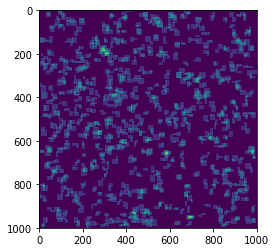

In [5]:
plt.imshow(fabric)

In [24]:
fabric.max()

7

In [7]:
a = np.random.randint(0, 3, (5, 5))

In [8]:
fabric

array([[1, 1, 2, 1, 0],
       [1, 2, 2, 0, 0],
       [2, 0, 2, 0, 2],
       [1, 2, 2, 2, 1],
       [2, 2, 0, 1, 1]])

In [9]:
from scipy import ndimage

In [10]:
ndimage.label(a)

(array([[1, 1, 1, 1, 0],
        [1, 1, 1, 0, 0],
        [1, 0, 1, 0, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1]], dtype=int32), 1)

In [11]:
a = np.zeros((5, 5))

In [12]:
b = np.zeros((5, 5))

In [13]:
a[:3, :3] = 1

In [22]:
b[2:, 2:] = 2

In [19]:
c = np.zeros((5, 5), dtype=np.bool)
c[1:4, 1:4] = True
c

array([[False, False, False, False, False],
       [False,  True,  True,  True, False],
       [False,  True,  True,  True, False],
       [False,  True,  True,  True, False],
       [False, False, False, False, False]])

In [23]:
np.dstack([a, b])[c]

array([[1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 2.],
       [0., 2.],
       [0., 0.],
       [0., 2.],
       [0., 2.]])

In [21]:
b

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 2.],
       [0., 0., 0., 2., 2.]])